# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*(1-p) = p\\
E[X^2] & = & 1*p + 0*(1-p) = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

In [ ]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

In [ ]:
#size=10000  #Cantidad de experimentos
#n=40        #numero de eventos certeros  
#p=0.3       #probabildiad de distribución
#cota        #nivel de exigencia para los errores
def simulacion_binomial(p,n,size,cota):
    error_prom=[]
    error_var=[]
    error_asim=[]
    error_curtos=[]
    
    resultado=0
    
    for i in range(1,size):
        datos_bin = stats.binom.rvs(n=n, p=p, size=i); 
        
        promedio = sum(datos_bin)/i
        var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/i
        asim = stats.skew(datos_bin)
        curtos = stats.kurtosis(datos_bin)
        
        prom_t = n*p
        var_t = n*p*(1-p)
        asim_t = (1-2*p)/(math.sqrt(n*p*(1-p)))
        curtos_t = (1-6*p*(1-p))/(n*p*(1-p))
        
        error_prom.append(abs((prom_t - promedio)/prom_t))
        error_var.append(abs((var_t - var_emp)/var_t))
        error_asim.append(abs((asim_t - asim)/asim_t))
        error_curtos.append(abs((curtos_t - curtos)/curtos_t))
        
        if(error_prom[i-1]<cota and
          error_var[i-1]<cota and
          error_asim[i-1]<cota and
          error_curtos[i-1]<cota):
            resultado=i
            break;
    
    print("Se necesitan: ",resultado," simulaciones")
    
    fig, ax = plt.subplots(2, 2,figsize=(17, 17), dpi=30)
    fig.suptitle('Gráficos de Error de estadísgrafos') 
    ax[0,0].plot(error_prom)
    ax[0,0].set_title('Error Esperanza')
    ax[0,0].set(xlabel='iteraciones', ylabel='error')

    ax[0,1].plot(error_var)
    ax[0,1].set_title('Error Varianza')
    ax[0,1].set(xlabel='iteraciones', ylabel='error')

    ax[1,0].plot(error_asim)
    ax[1,0].set_title('Error Asimetría')
    ax[1,0].set(xlabel='iteraciones', ylabel='error')

    ax[1,1].plot(error_curtos)
    ax[1,1].set_title('Error Curtosis')
    ax[1,1].set(xlabel='iteraciones', ylabel='error')

In [ ]:
#p=0.3       #probabildiad de distribución
#n=40        #numero de eventos certeros  
#size=10000  #Cantidad de experimentos
#tolerancia        #nivel de exigencia para los errores     
simulacion_binomial(0.4,40,2000,0.09)

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

In [ ]:
simulacion_binomial(0.3,60,100000,0.01)

In [ ]:
simulacion_binomial(0.7,20,100000,0.1)

In [ ]:
simulacion_binomial(0.4,40,1000,0.1)

----

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson


$P(X=x)  =  \frac{\mu e^{-\mu}}{x!}, \qquad x=0,1,...n $

$E[X]  =  \mu$

$Var(X) = \mu$

$Simetria(X) = {\frac{-1}{\sqrt{\mu}}}$

$Curtosis(X) = 3 + \mu^{-1}$




In [ ]:
# simulación de size valores v.a. poisson
size=100
mu = 50
datos_poisson =stats.poisson.rvs(mu, size=size) 
#rvs: Random variates
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i, mu=mu))
    #pmf: Probability mass function_probabilidad puntual
ax2.plot(vec,pvec)
plt.draw()

In [ ]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_poisson = ecdf(datos_poisson)
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()

In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio)*(datos_poisson-promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)
print('Esperanza empírica:',promedio,'   teórica: ',mu)
print('Varianza empírica:',var_emp,' teórica: ', mu)
print('Asimetría empírica:', asim, 'teórica: ',1/math.sqrt(mu))
print('Curtosis empírico: ', curtos, 'teórico: ',3+(pow(mu,-1)))

In [ ]:
#size=10000  #Cantidad de experimentos
#mu = 40        #
#cota < 1        #nivel de exigencia para los errores
def simulacion_poisson(mu,size,cota):
    error_prom=[]
    error_var=[]
    error_asim=[]
    error_curtos=[]
    
    resultado=0
    
    for i in range(1,size):
        datos_psn = stats.poisson.rvs(mu, size=i)
        
        promedio = sum(datos_psn)/i
        var_emp = sum((datos_psn - promedio)*(datos_psn-promedio))/i
        asim = stats.skew(datos_psn)
        curtos = stats.kurtosis(datos_psn)
        
        prom_t = mu
        var_t = mu
        asim_t = 1/math.sqrt(mu)
        curtos_t = 3+(pow(mu,-1))
        
        error_prom.append(abs((prom_t - promedio)/prom_t))
        error_var.append(abs((var_t - var_emp)/var_t))
        error_asim.append(abs((asim_t - asim)/asim_t))
        error_curtos.append(abs((curtos_t - curtos)/curtos_t))
        
        if(error_prom[i-1]<cota and
          error_var[i-1]<cota and
          error_asim[i-1]<cota and
          0.75<error_curtos[i-1]<1.5):
            resultado=i
            break;
    
    print("Se necesitan: ",resultado," simulaciones")
    
    fig, ax = plt.subplots(2, 2,figsize=(17, 17), dpi=40)
    fig.suptitle('Gráficos de Error de estadísgrafos') 
    ax[0,0].plot(error_prom)
    ax[0,0].set_title('Error Esperanza')
    ax[0,0].set(xlabel='iteraciones', ylabel='error')

    ax[0,1].plot(error_var)
    ax[0,1].set_title('Error Varianza')
    ax[0,1].set(xlabel='iteraciones', ylabel='error')

    ax[1,0].plot(error_asim)
    ax[1,0].set_title('Error Asimetría')
    ax[1,0].set(xlabel='iteraciones', ylabel='error')

    ax[1,1].plot(error_curtos)
    ax[1,1].set_title('Error Curtosis')
    ax[1,1].set(xlabel='iteraciones', ylabel='error')

In [ ]:
simulacion_poisson(50,5000,0.009)

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

In [ ]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [ ]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

In [ ]:
#(1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

def simulacion_val(mu, sigma, size, cota, sims):
    
    d_n =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
    
    esperanza = []
    varianza = []
    asimetria = []
    curtosis = []
    
    r=0
    
    resultado=sims
    
    e_teorica = mu
    v_teorica = sigma**2
    a_teorica = 0
    c_teorica = 0
    
    for i in range(1,size):
    
        d_n =stats.norm.rvs(loc=mu, scale= sigma, size=sims) 
        e_empirica = sum(d_n)/sims
        v_empirica = sum((d_n - e_teorica)*(d_n-e_teorica))/sims
        a_empirica = stats.skew(d_n)
        c_empirica = stats.kurtosis(d_n)
        if (   (abs(e_teorica - e_empirica) < cota)
           and (abs(v_teorica - v_empirica) < cota)
           and (abs(a_teorica - a_empirica) < cota)
           and (abs(c_teorica - c_empirica) < cota)):
            break
        esperanza.append(e_empirica)
        varianza.append(v_empirica)
        asimetria.append(a_empirica)
        curtosis.append(c_empirica)
        sims += 100
    
    resultado=sims/100
    
    print("Se necesitan: ",resultado," simulaciones")
    
    fig, axs = plt.subplots(2, 2, figsize=(10,9))

    x_sims = np.arange(100,sims,100)

    axs[0, 0].plot(x_sims, esperanza)
    axs[0, 0].axhline(y=e_teorica, color='r', linestyle='-', label='Esperanza teorica')
    axs[0, 0].set_title('Esperanza')

    axs[0, 1].plot(x_sims, varianza)
    axs[0, 1].axhline(y=v_teorica, color='r', linestyle='-', label='Varianza teorica')
    axs[0, 1].set_title('Varianza')

    axs[1, 0].plot(x_sims, asimetria)
    axs[1, 0].axhline(y=a_teorica, color='r', linestyle='-', label='Asimetría teorica')
    axs[1, 0].set_title('Asimetría')

    axs[1, 1].plot(x_sims, curtosis)
    axs[1, 1].axhline(y=c_teorica, color='r', linestyle='-', label='Curtosis teorica')
    axs[1, 1].set_title('Curtosis')
    fig.tight_layout()

In [ ]:
simulacion_val(50, 10, 1000, 0.01, 100)

In [ ]:
#(2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (

simulacion_val(50, 10, 1000, 0.03, 100)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

__Distribución chi-cuadrado:__

Si la variable aleatoria continua $X$ tiene distribución chi-cuadrado con k grados de libertad, entonces:

$X \sim \chi^2_k$

y la función densidad de la variable aleatoria $X$, está dado por:

$f_X(x)= \frac{(\frac{1}{2})^\frac{k}{2}}{\Gamma (\frac{k}{2})} x^{\frac{k}{2}-1} e^{\frac{-x}{2}}$ , para $x > 0$ y $\Gamma$ corresponde a la función gamma. 


$E[X] = k$

$Var(X) = 2k$

$Simetría(X) = \sqrt{\frac{8}{k}}$

$Curtosis = \frac{12}{k}$

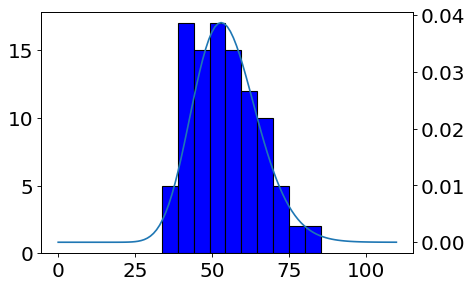

In [2]:
## simulación de size valores v.a. normal
#df grados de libertad (k)
size=100
df=55
datos_chi2 = stats.chi2.rvs(df, size=size)
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_chi2, color = 'blue', edgecolor = 'black')
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*df+1))
##
pvec = []
for i in vec:
    pvec.append(stats.chi2.pdf(x=i, df=df))
ax2.plot(vec,pvec)
plt.draw()

<BarContainer object of 100 artists>

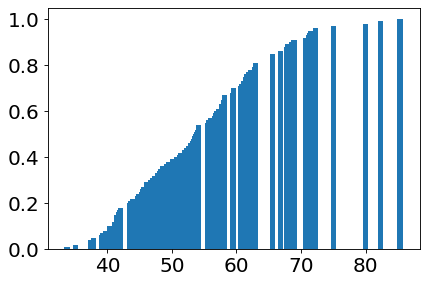

In [3]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_chi2 = ecdf(datos_chi2)
ax.bar(x,cum_chi2)

In [4]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi2)/size
var_emp = sum((datos_chi2 - promedio)*(datos_chi2-promedio))/size
asim = stats.skew(datos_chi2)
curtos = stats.kurtosis(datos_chi2)
print('Esperanza empírica:',promedio,'   teórica: ',df)
print('Varianza empírica:',var_emp,' teórica: ', 2*df)
print('Asimetría empírica:', asim, 'teórica: ',math.sqrt(8/df))
print('Curtosis empírico: ', curtos, 'teórico: ',12/df)

Esperanza empírica: 54.31011668737251    teórica:  55
Varianza empírica: 121.93893221505265  teórica:  110
Asimetría empírica: 0.4081672377628709 teórica:  0.3813850356982369
Curtosis empírico:  -0.2958624472962672 teórico:  0.21818181818181817


In [12]:
#size=10000  #Cantidad de experimentos
#df = 55        k grados de libertad
#cota < 1        #nivel de exigencia para los errores
def simulacion_chi2(df,size,cota):
    error_prom=[]
    error_var=[]
    error_asim=[]
    error_curtos=[]
    
    resultado=0
    
    for i in range(1,size):
        datos_chi2 = stats.chi2.rvs(df, size=i)
        
        promedio = sum(datos_chi2)/i
        var_emp = sum((datos_chi2 - promedio)*(datos_chi2-promedio))/i
        asim = stats.skew(datos_chi2)
        curtos = stats.kurtosis(datos_chi2)
        
        prom_t = df
        var_t = df
        asim_t = math.sqrt(1/df)
        curtos_t = 12/df
        
        error_prom.append(abs((prom_t - promedio)/prom_t))
        error_var.append(abs((var_t - var_emp)/var_t))
        error_asim.append(abs((asim_t - asim)/asim_t))
        error_curtos.append(abs((curtos_t - curtos)/curtos_t))
        
        if(error_prom[i-1]<cota and
          error_var[i-1]<cota and
          error_asim[i-1]<cota and
          0.75<error_curtos[i-1]<1.5):
            resultado=i
            break;
    
    #print("Se necesitan: ",resultado," simulaciones")
    
    fig, ax = plt.subplots(2, 2,figsize=(17, 17), dpi=60)
    fig.suptitle('Gráficos de Error de estadísgrafos') 
    ax[0,0].plot(error_prom)
    ax[0,0].set_title('Error Esperanza')
    ax[0,0].set(xlabel='iteraciones', ylabel='error')

    ax[0,1].plot(error_var)
    ax[0,1].set_title('Error Varianza')
    ax[0,1].set(xlabel='iteraciones', ylabel='error')

    ax[1,0].plot(error_asim)
    ax[1,0].set_title('Error Asimetría')
    ax[1,0].set(xlabel='iteraciones', ylabel='error')

    ax[1,1].plot(error_curtos)
    ax[1,1].set_title('Error Curtosis')
    ax[1,1].set(xlabel='iteraciones', ylabel='error')

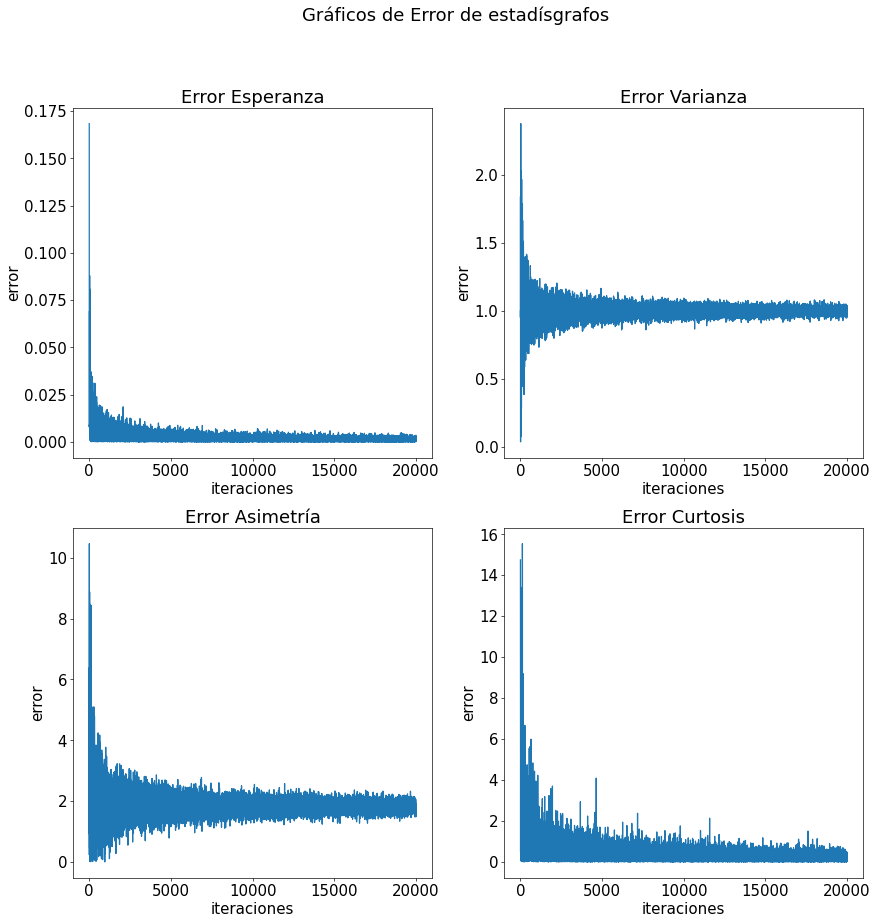

In [14]:
simulacion_chi2(55,20000, 0.1)

---

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

In [11]:
!ls

datos_sismos.csv  info147_tarea2.ipynb	prototipo.ipynb
datos_sismos.xls  Laboratorio2.ipynb


In [270]:
df = pd.read_csv('datos_sismos.csv', index_col=0)
idx=df.index
columns=df.columns
data = pd.DataFrame(data=df,index=df.index,columns=df.columns)

### Localizacion 1 =  Sector La Serena (IV Región de Coquimbo) Zona coordillerana

In [272]:
data1 = data[(data.Latitud<-30)&(data.Latitud>-33)&(data.Longitud<-69)&(data.Longitud>-71)]

In [273]:
data1.shape

(38, 4)

### Localizacion 2 = Sector Antofagasta (II Ragion de Tarapacacá) Zona coordillerana

In [274]:
data2 = data[(data.Latitud<-22)&(data.Latitud>-23)&(data.Longitud<-68)&(data.Longitud>-69)]

In [275]:
data2.shape

(53, 4)

# Revision de datos con respecto a una locación 1

### Datos y gráfica relacionados a la profundidad de la Locacion 1

In [283]:
promedio_l11 = sum(data1.Profundidad)/data1.shape[0]
var_emp_l11 = sum((data1.Profundidad - promedio_l11)*(data1.Profundidad-promedio_l11))/data1.shape[0]
asim_l11 = stats.skew(data1.Profundidad)
curtos_l11 = stats.kurtosis(data1.Profundidad)
print("Estadígrafos de la profundidad")
print("Promedio: ",promedio_l11)
print("Varianza empírica: ",var_emp_l11)
print("Asimmetría: ",asim_l11)
print("Curtossis: ",curtos_l11)

Estadígrafos de la profundidad
Promedio:  108.23684210526316
Varianza empírica:  1005.4439058171744
Asimmetría:  -0.8114151052820776
Curtossis:  2.2180108040970143


[Text(0.5, 0, 'Nivel de profundidad [km]'), Text(0, 0.5, 'Muestras')]

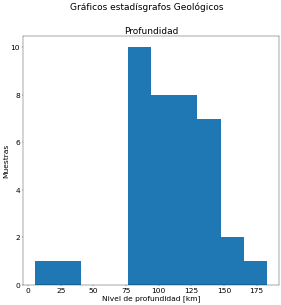

In [285]:
fig, ax = plt.subplots(1, 1,figsize=(11, 11),dpi=30)
fig.suptitle('Gráficos estadísgrafos Geológicos') 
ax.hist(data1.Profundidad)
ax.set_title('Profundidad')
ax.set(xlabel='Nivel de profundidad [km]', ylabel='Muestras')

### Datos y gráfica relacionados a la magnitud de la Locacion 1

In [286]:
promedio_l12 = sum(data1.Magnitud)/data1.shape[0]
var_emp_l12 = sum((data1.Magnitud - promedio_l12)*(data1.Magnitud-promedio_l12))/data1.shape[0]
asim_l12 = stats.skew(data1.Magnitud)
curtos_l12 = stats.kurtosis(data1.Magnitud)
print("Estadígrafos de la Magnitud")
print("Promedio: ",promedio_l12)
print("Varianza empírica: ",var_emp_l12)
print("Asimmetría: ",asim_l12)
print("Curtossis: ",curtos_l12)

Estadígrafos de la Magnitud
Promedio:  4.792105263157895
Varianza empírica:  0.2570429362880886
Asimmetría:  0.6301039828818384
Curtossis:  0.2407625217592777


[Text(0.5, 0, 'Nivel de potencia'), Text(0, 0.5, 'Muestras')]

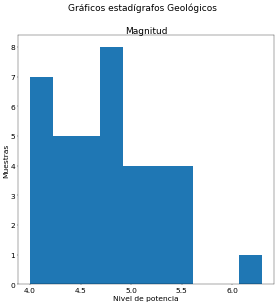

In [287]:
fig, ax = plt.subplots(1, 1,figsize=(11, 11),dpi=30)
fig.suptitle('Gráficos estadígrafos Geológicos') 
ax.hist(data1.Magnitud)
ax.set_title('Magnitud')
ax.set(xlabel='Nivel de potencia', ylabel='Muestras')

# Revision de datos con respecto a una locación 2

### Datos y gráfica relacionados a la profundidad de la Locacion 2

In [288]:
promedio_l21 = sum(data2.Profundidad)/data2.shape[0]
var_emp_l21 = sum((data2.Profundidad - promedio_l21)*(data2.Profundidad-promedio_l21))/data2.shape[0]
asim_l21 = stats.skew(data2.Profundidad)
curtos_l21 = stats.kurtosis(data2.Profundidad)
print("Estadígrafos de la profundidad")
print("Promedio: ",promedio_l21)
print("Varianza empírica: ",var_emp_l21)
print("Asimetria: ",asim_l21)
print("Curtosis: ",curtos_l21)

Estadígrafos de la profundidad
Promedio:  112.0754716981132
Varianza empírica:  168.9377002491991
Asimetria:  0.7028106282540364
Curtosis:  1.2726213844453493


[Text(0.5, 0, 'Nivel de profundidad [km]'), Text(0, 0.5, 'Muestras')]

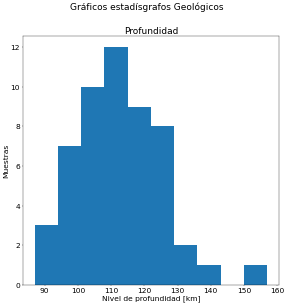

In [289]:
fig, ax = plt.subplots(1, 1,figsize=(11, 11),dpi=30)
fig.suptitle('Gráficos estadísgrafos Geológicos') 
ax.hist(data2.Profundidad)
ax.set_title('Profundidad')
ax.set(xlabel='Nivel de profundidad [km]', ylabel='Muestras')

### Datos y gráfica relacionados a la magnitud de la Locacion 2

In [290]:
promedio_l22 = sum(data2.Magnitud)/data2.shape[0]
var_emp_l22 = sum((data2.Magnitud - promedio_l22)*(data2.Magnitud-promedio_l22))/data2.shape[0]
asim_l22 = stats.skew(data2.Magnitud)
curtos_l22 = stats.kurtosis(data2.Magnitud)
print("Estadígrafos de la Magnitud")
print("Promedio: ",promedio_l22)
print("Varianza empírica: ",var_emp_l22)
print("Asimetria: ",asim_l22)
print("Curtosis: ",curtos_l22)

Estadígrafos de la Magnitud
Promedio:  4.70188679245283
Varianza empírica:  0.180939836240655
Asimetria:  0.40760674234741295
Curtosis:  -0.34624114225138447


[Text(0.5, 0, 'Nivel de potencia'), Text(0, 0.5, 'Muestras')]

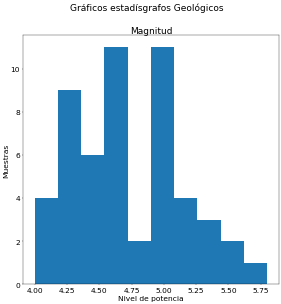

In [291]:
fig, ax = plt.subplots(1, 1,figsize=(11, 11),dpi=30)
fig.suptitle('Gráficos estadísgrafos Geológicos') 
ax.hist(data2.Magnitud)
ax.set_title('Magnitud')
ax.set(xlabel='Nivel de potencia', ylabel='Muestras')

## Resultados Comparativos

In [292]:
def calculo_distancia(a,b,add):
    rst = math.sqrt( (math.pow(a,2)+ math.pow(b,2))/2)
    print("Existe una diferencia de: ",rst,"",add)

#### Resultados respecto a la Profundidad en [km] = unidad de distancia kilómetros

In [293]:
calculo_distancia(promedio_l11,promedio_l21,"[km] en promedio de profundidad")
calculo_distancia(var_emp_l11,var_emp_l21,"[km] en Variabilidad de la profundidad")
calculo_distancia(asim_l11,asim_l21,"[km] en Asimetría de la profundidad")
calculo_distancia(curtos_l11,curtos_l21,"[km] en Forma(curtosis) de la profundidad")  

Existe una diferencia de:  110.17287630191527  [km] en promedio de profundidad
Existe una diferencia de:  720.9221158732694  [km] en Variabilidad de la profundidad
Existe una diferencia de:  0.7590577225306249  [km] en Asimetría de la profundidad
Existe una diferencia de:  1.8081948339765106  [km] en Forma(curtosis) de la profundidad


#### Resultados respecto a la Magnitud en [uP] =  unidad de potencia

In [294]:
calculo_distancia(promedio_l12,promedio_l22,"[uP] en promedio de magnitud")
calculo_distancia(var_emp_l12,var_emp_l22,"[uP] en Variabilidad de la magnitud")
calculo_distancia(asim_l12,asim_l22,"[uP] en Asimetría de la magnitud")
calculo_distancia(curtos_l12,curtos_l22,"[uP] en Forma(curtosis) de la magnitud")  

Existe una diferencia de:  4.747210352524309  [uP] en promedio de magnitud
Existe una diferencia de:  0.2222726877445781  [uP] en Variabilidad de la magnitud
Existe una diferencia de:  0.5306478519934978  [uP] en Asimetría de la magnitud
Existe una diferencia de:  0.2982025490094192  [uP] en Forma(curtosis) de la magnitud


### Conclusion

Con respecto a la profundidad: 
- el estadígrafo de promedio, cual indica un valor de 110km de distancia aprox.
- El estadígrafo de variabilidad, nos indica un valor de 11766km aprox.
- Eñ estadígrafo de asimegría, nos indica un valor de 0.75[km] aprox.
- El estadígrafo de curtosis, nos indica un valor de 1.808[km] aprox.

Los eventos de las 2 regiones, nos podría decir que se ubica en una capa litosfera cercana a la atnosfera, cual puede deberse a algun desplazamiento de masa débil interior efectuando evento sismico hacia la supervicie considerando el promedio. En cuanto a la variabilidad, nos logra decir que estos eventos a pesar de estar focalizados, existen otros aislados que provienen de lo más profundo desde la mesosfera, que posiblemente sea a causa de reacciones en cadena. Por otro lado la asimetría son cercanas a la relacion a los eventos por su distancia cuales consta de una diferencia muy baja. Por su curtosis, nos indica que el desplazamiento de los datos se carga más hacia el lado izquierdo, esto nos indica que posiblemente los eventos son concentrados en una capa específica de la supericie terrestre, cual puede podría denominarse a la altura de los sectores coordilleranos

Con respecto a la Magnitud:
- El estadígrafo de promedio, cual indica un valor de 4,7[uP] aprox.
- El estadígrafo de variabilidad, nos indica un valor de 0.22[uP] aprox.
- El estadígrafo de asimetría, nos indica un valor de 0.55[uP] aprox.
- El estadígrafo de curtosis, nos indica un valor de 0.22[uP] aprox.

Los eventos en las 2 regiones, nos podría decir que en los sectores coordilleranos se atenua un nivel de potencia ligero según los datos de [1], indicando además un promedio de 6800 actividades al año, considerando las condiciones geográficas en las que se atenuan estos eventos. La variabilidad nos dice que dichos eventos se conservan dentro de la escala ligera, lo cual nos puede decir que dichas actividades no son parte de perturbaciones extremas. La asimetría nos indica que los valores a pesar de tener una estrecha relacion en valores, las actividades no se concentran un un valor específico debido que están granuladas dentro de una escala muy baja. La curtosis nos puede indicar que la concentración de los datos están ligados a estar mayormente orientados a actividades

### Referencias

[1] https://es.wikipedia.org/wiki/Escala_sismológica_de_Richter
https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
